In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad

import numpy as np
from astropy import units as u
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
name = "ONC"
width = 0.2 * u.deg
result_table = Simbad.query_object(name)
ra, dec = result_table["RA"][0], result_table["DEC"][0]

coord = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')

tbl = Gaia.query_object_async(coordinate=coord, width=width, height=width)

INFO: Query finished. [astroquery.utils.tap.core]


Text(0, 0.5, 'Dec [deg]')

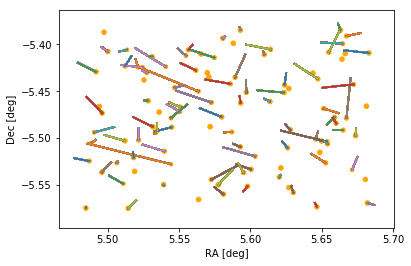

In [11]:
years = 3000

mas_to_deg = u.mas.to(u.deg)

size = tbl["phot_g_mean_mag"]
x, y = tbl["ra"], tbl["dec"]
dx, dy = tbl["pmra"] * mas_to_deg, tbl["pmdec"] * mas_to_deg
dx *= years
dy *= years

plt.scatter(x, y, s=size, c="orange")
for i in range(len(x)):
    plt.plot([x, x-dx], [y, y-dy])

plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")